In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Path to the data directory
base_path = r"C:\Users\Simon\Documents\Vs-kode\IKT450-Project\processed_data"

# Load the preprocessed datasets from Pickle files
X_train = pd.read_pickle(f"{base_path}/X_train.pkl")
y_train = pd.read_pickle(f"{base_path}/y_train.pkl")

X_val = pd.read_pickle(f"{base_path}/X_val.pkl")
y_val = pd.read_pickle(f"{base_path}/y_val.pkl")

X_test = pd.read_pickle(f"{base_path}/X_test.pkl")
y_test = pd.read_pickle(f"{base_path}/y_test.pkl")

activity_labels = pd.read_csv(f"C:\\Users\\Simon\\Documents\\Vs-kode\IKT450-Project\data\\activity_labels.txt", sep="\s+", header=None, names=["activity_id", "activity_name"])
activity_labels['activity_id'] = activity_labels['activity_id'] - 1

print("Datasets successfully loaded from Pickle files!")

Datasets successfully loaded from Pickle files!


In [2]:
y_val.head()

,activity_id
3549,0
5608,0
5342,5
5450,1
3749,0


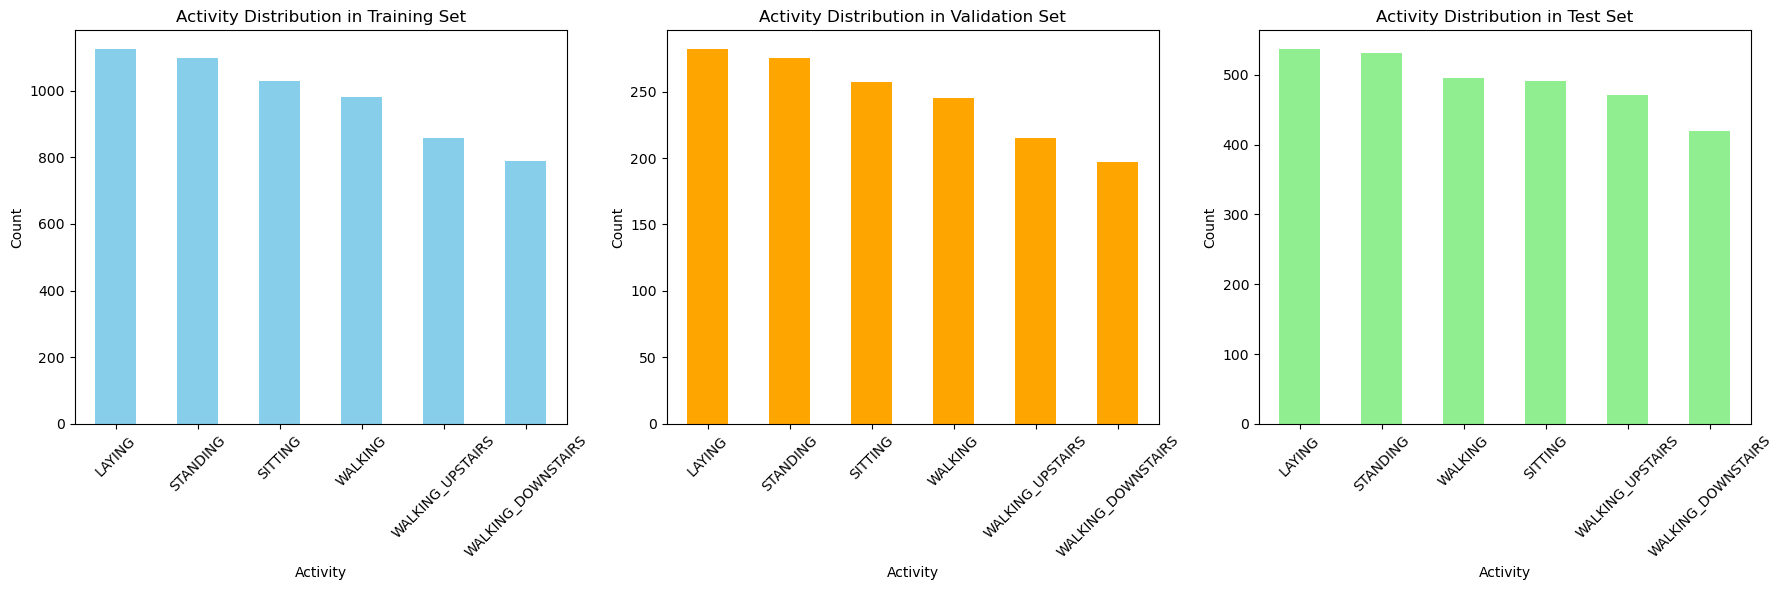

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each activity in training, validation, and test sets
activity_counts_train = y_train['activity_id'].value_counts()
activity_counts_val = y_val['activity_id'].value_counts()
activity_counts_test = y_test['activity_id'].value_counts()

# Map activity IDs to activity names for readability
activity_names = activity_labels.set_index('activity_id')['activity_name']
activity_counts_train.index = activity_counts_train.index.map(activity_names)
activity_counts_val.index = activity_counts_val.index.map(activity_names)
activity_counts_test.index = activity_counts_test.index.map(activity_names)

# Plot the distribution of activities in training, validation, and test sets
plt.figure(figsize=(18, 6))

# Training set distribution
plt.subplot(1, 3, 1)
activity_counts_train.plot(kind='bar', color='skyblue')
plt.title('Activity Distribution in Training Set')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Validation set distribution
plt.subplot(1, 3, 2)
activity_counts_val.plot(kind='bar', color='orange')
plt.title('Activity Distribution in Validation Set')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Test set distribution
plt.subplot(1, 3, 3)
activity_counts_test.plot(kind='bar', color='lightgreen')
plt.title('Activity Distribution in Test Set')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
